# Trends-based recommendation
In this notebook we will classify the tweets into trends and these trends will help us decide which hashtags to recommend 

In [1]:
import sys

sys.path.append(sys.path[0] + './../')

In [2]:
from NLP.files_reader import *
import tensorflow as tf
import nltk

## Get the data

In [3]:
tweets_and_trends = []
tweets = []
trends = []

files_prefix = './../'

tweets_and_trends += (FilesReader.read_file(files_prefix + new_US_file))
tweets_and_trends += (FilesReader.read_file(files_prefix + new_UK_file))
tweets_and_trends += (FilesReader.read_file(files_prefix + new_AUS_file))
tweets_and_trends += (FilesReader.read_file(files_prefix + new_CAN_file))
tweets_and_trends += (FilesReader.read_file(files_prefix + new_IR_file))

random.shuffle(tweets_and_trends)

tweets, trends = FilesReader.split_tweets_and_trends(tweets_and_trends)
print(f"We have {len(tweets)} tweets.")


We have 28601 tweets.


## Stemming and lemmatization

In [5]:
from NLP.lemmatizer_and_stemmer import LemmatizerAndStemmer

print(f"before: {tweets[:3]}")
for i, tweet in enumerate(tweets):
    processed_tweet = LemmatizerAndStemmer.stem_and_lemmatize_tweet(tweet)
    tweets[i] = processed_tweet
    

print(f"after: {tweets[:3]}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


before: ['aww sooo cute roses ricky', 'friday night footy', 'roses ricky qk']
after: ['aww sooo cute rose ricki  ', 'friday night footi  ', 'rose ricki qk  ']


## Tokenize the text

In [6]:
from keras.preprocessing.text import Tokenizer

tweets_tokenizer = Tokenizer(oov_token="<OOV>")
tweets_tokenizer.fit_on_texts(tweets)
tweets_word_index = tweets_tokenizer.word_index
tweets_index_word = tweets_tokenizer.index_word

print(f"We have {len(tweets_word_index)} different words")
print(tweets_word_index)

We have 16873 different words
{'<OOV>': 1, 'happi': 2, 'get': 3, 'like': 4, 'go': 5, 'good': 6, 'friday': 7, 'ricki': 8, 'duba': 9, 'one': 10, 'im': 11, 'day': 12, 'amp': 13, 'love': 14, 'powel': 15, 'time': 16, 'rose': 17, 'dont': 18, 'weekend': 19, 'look': 20, 'today': 21, 'see': 22, 'leaf': 23, 'bonang': 24, 'game': 25, 'need': 26, 'kyle': 27, 'come': 28, 'let': 29, 'back': 30, 'want': 31, 'say': 32, 'make': 33, 'new': 34, 'got': 35, 'anni': 36, 'u': 37, 'know': 38, 'team': 39, 'well': 40, 'season': 41, 'take': 42, 'watch': 43, 'think': 44, 'great': 45, 'play': 46, 'year': 47, 'everyon': 48, 'week': 49, 'win': 50, 'fan': 51, 'gm': 52, 'cant': 53, 'fuck': 54, 'keef': 55, 'lui': 56, 'way': 57, 'would': 58, 'show': 59, 'morn': 60, 'next': 61, 'give': 62, 'swanki': 63, 'first': 64, 'tri': 65, 'shanahan': 66, 'matthew': 67, 'khanyi': 68, 'hope': 69, 'andil': 70, 'peopl': 71, 'feel': 72, 'realli': 73, 'still': 74, 'he': 75, 'even': 76, 'that': 77, 'much': 78, 'birthday': 79, 'start': 80, 

## Create the padded sequences

In [7]:
from keras.utils import pad_sequences
sequence_length = 15

tweets_sequences = tweets_tokenizer.texts_to_sequences(tweets)
tweets_sequences_padded = pad_sequences(tweets_sequences, padding="post", maxlen=sequence_length)

## Map the trends to numbers

In [8]:
trends_map = {}

counter = 0

for trend in trends:
    if not (trend in trends_map):
        trends_map[trend] = counter
        counter += 1

no_of_trends = len(trends_map)
inv_trends_map = {v: k for k, v in trends_map.items()}
print(f"We have {no_of_trends} different trends")
print(trends_map)

We have 35 different trends
{'StrawberRickyDay': 0, 'nrlsouthseels': 1, 'fridaymorning': 2, 'YoungFamousAfrican': 3, 'LeafsForever': 4, 'TheChase': 5, 'FridayFeeling': 6, 'Matthews': 7, 'NRLDragonsRoosters': 8, 'Dubas': 9, 'Hertz': 10, 'Shanahan': 11, 'FursuitFriday': 12, 'Stan Grant': 13, 'AFLPowerDees': 14, 'Powell': 15, 'Tim Keller': 16, 'Notley': 17, 'mcyvsyd': 18, 'Tulsky': 19, 'Keefe': 20, 'Andy Rourke': 21, 'Russell Martin': 22, 'Alun Wyn Jones': 23, 'Tim Scott': 24, 'longweekend': 25, 'Summer Walker': 26, 'Carrie Johnson': 27, 'Copium': 28, 'Pridham': 29, 'FridayFive': 30, 'Just Stop Oil': 31, 'Shanny': 32, 'Tipuric': 33, 'iaxcNft': 34}


## Create the trends sequences

In [9]:
trends_sequences = [trends_map[trend] for trend in trends]
print(trends_sequences)

[0, 1, 0, 2, 3, 3, 4, 5, 4, 6, 2, 5, 7, 8, 2, 0, 0, 5, 9, 7, 10, 5, 11, 3, 5, 8, 12, 5, 13, 2, 3, 5, 3, 3, 3, 14, 12, 11, 3, 15, 5, 6, 11, 2, 3, 16, 3, 2, 3, 3, 5, 8, 8, 4, 4, 4, 12, 4, 6, 5, 14, 5, 12, 8, 3, 11, 5, 5, 2, 15, 17, 4, 7, 8, 3, 5, 3, 4, 3, 6, 3, 2, 3, 14, 5, 3, 11, 14, 3, 12, 3, 15, 6, 5, 13, 4, 2, 12, 3, 3, 5, 7, 18, 14, 2, 8, 0, 3, 4, 6, 3, 2, 2, 2, 18, 4, 5, 3, 5, 17, 19, 7, 20, 12, 5, 11, 5, 21, 3, 4, 20, 5, 5, 8, 8, 2, 14, 3, 15, 2, 14, 1, 5, 5, 6, 15, 5, 21, 22, 3, 1, 12, 4, 5, 6, 5, 2, 14, 14, 6, 3, 15, 14, 3, 0, 2, 0, 6, 12, 17, 8, 1, 4, 4, 6, 3, 2, 6, 3, 17, 4, 5, 3, 4, 3, 6, 5, 3, 11, 8, 5, 2, 8, 14, 4, 14, 12, 21, 14, 18, 2, 3, 4, 12, 14, 2, 5, 6, 3, 23, 5, 5, 14, 4, 1, 5, 2, 3, 7, 5, 14, 4, 5, 20, 3, 4, 5, 18, 12, 4, 14, 6, 1, 15, 5, 3, 6, 2, 12, 6, 8, 5, 5, 5, 3, 2, 11, 4, 2, 5, 2, 2, 6, 5, 5, 4, 18, 2, 8, 3, 24, 3, 4, 11, 4, 3, 6, 5, 3, 25, 25, 3, 5, 1, 15, 18, 8, 12, 5, 1, 15, 6, 12, 12, 14, 5, 5, 12, 12, 14, 6, 5, 6, 1, 26, 14, 3, 7, 2, 5, 4, 5, 14, 6, 0, 

## Encode the trends

In [10]:
from keras.utils import to_categorical
import tensorflow as tf

encoded_trends = to_categorical(trends_sequences)
print(encoded_trends.shape)

(28601, 35)


## Prepare the pre-trained embeddings

In [11]:
from NLP.Embeddings.embeddings_matrix import get_embeddings_matrix

embeddings_index_path = "./../NLP/Embeddings/embeddings_index_object.pkl"
embeddings_matrix, hits, misses = get_embeddings_matrix(tweets_word_index, embeddings_index_path)

print(f"Hits: {hits}, Misses: {misses}")

Hits: 12013, Misses: 4860


## Split the data

In [12]:
training_split = 0.8
training_tweets_count = int(0.8 * len(tweets_sequences_padded))

In [13]:
train_data = tweets_sequences_padded[0:training_tweets_count]
train_labels = encoded_trends[0:training_tweets_count]
test_data = tweets_sequences_padded[training_tweets_count:]
test_labels = encoded_trends[training_tweets_count:]

print(f'we have {len(train_data)} tweets for training and {len(test_data)} for testing')

we have 22880 tweets for training and 5721 for testing


## Tune the hyper-parameters

In [13]:
# import keras_tuner as kt
# import keras
# from keras import initializers
# import tensorflow as tf

# no_of_tweets_words = len(tweets_word_index) + 1
# embedding_dimensions = 300

# def model_builder(hp):
#     model = keras.Sequential()

#     hp_conv_filters = hp.Int('conv_filters', min_value=32, max_value=256, step=16)
#     hp_kernel_size = hp.Int('conv_kernel_size', min_value=2, max_value=5, step=1)
#     hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.6, step=0.1)
#     hp_lstm = hp.Int('lstm_units', min_value=32, max_value=256, step=16)

#     model.add(keras.layers.Embedding(
#         no_of_tweets_words,
#         embedding_dimensions,
#         input_length=sequence_length,
#         embeddings_initializer=initializers.Constant(embeddings_matrix),
#         trainable=True
#     ))
#     model.add(keras.layers.Conv1D(hp_conv_filters, hp_kernel_size, padding='same'))
#     model.add(keras.layers.Dropout(hp_dropout))
#     model.add(keras.layers.Bidirectional(keras.layers.LSTM(hp_lstm)))
#     model.add(keras.layers.Dropout(hp_dropout))
#     model.add(keras.layers.Dense(no_of_trends))

#     # Tune the learning rate for the optimizer
#     # Choose an optimal value from 0.01, 0.001, or 0.0001
#     hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                   loss=keras.losses.CategoricalCrossentropy(
#                       from_logits=True),
#                   metrics=['accuracy'])

#     return model


In [14]:
# tuner = kt.Hyperband(model_builder,
#                      objective='val_accuracy',
#                      max_epochs=6,
#                      factor=3,
#                      directory='parameters_tuning',
#                      project_name='trends_classifier')

In [15]:
# tuner.search(train_data, train_labels, epochs=50, validation_data=(test_data, test_labels))

In [16]:
# best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. Here are the optimal configurations:
#     conv_filters: {best_hps.get('conv_filters')}
#     conv_kernel_size: {best_hps.get('conv_kernel_size')}
#     lstm_units: {best_hps.get('lstm_units')}
#     dropout: {best_hps.get('dropout')}
#     learning_rate: {best_hps.get('learning_rate')}
# """)

In [17]:
# trends_classifier = tuner.hypermodel.build(best_hps)
# history = trends_classifier.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

# val_acc_per_epoch = history.history['val_accuracy']
# best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
# print('Best epoch: %d' % (best_epoch,))

In [18]:
# trends_classifier = tuner.hypermodel.build(best_hps)
# trends_classifier.fit(train_data, train_labels, epochs=best_epoch, validation_data=(test_data, test_labels))

## Build the model
After tuning the hyper-parameters, here are the optimal configurations: <br>
    conv_filters: 224 <br>
    conv_kernel_size: 2<br>
    lstm_units: 144<br>
    dropout: 0.1<br>
    learning_rate: 0.001<br>

In [14]:
#hyperparameters
embedding_dimensions = 300
lstm_units = 144
dropout_value = 0.1
conv_filters = 224
conv_kernel_size = 2

In [15]:
from keras import initializers
import tensorflow as tf

no_of_tweets_words = len(tweets_word_index) + 1

trends_classifier = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        no_of_tweets_words,
        embedding_dimensions,
        input_length=sequence_length,
        embeddings_initializer=initializers.Constant(embeddings_matrix),
        trainable=True
    ),
    tf.keras.layers.Conv1D(conv_filters, conv_kernel_size, activation='relu'),
    tf.keras.layers.AveragePooling1D(),
    tf.keras.layers.Dropout(dropout_value),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, activation='tanh')),
    tf.keras.layers.Dropout(dropout_value),
    tf.keras.layers.Dense(no_of_trends, activation='softmax')
])

trends_classifier.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

trends_classifier.summary()

# trends_classifier = tf.keras.models.load_model("trends_classifier")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 300)           5062200   
                                                                 
 conv1d (Conv1D)             (None, 14, 224)           134624    
                                                                 
 average_pooling1d (AverageP  (None, 7, 224)           0         
 ooling1D)                                                       
                                                                 
 dropout (Dropout)           (None, 7, 224)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 288)              425088    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 288)               0

In [16]:
epochs = 5
history = trends_classifier.fit(train_data, train_labels, epochs=epochs, validation_data=(test_data, test_labels))

Epoch 1/5
715/715 [==============================] - 21s 15ms/step - loss: 1.5610 - accuracy: 0.5361 - val_loss: 1.1858 - val_accuracy: 0.6383
Epoch 2/5
715/715 [==============================] - 10s 14ms/step - loss: 0.9086 - accuracy: 0.7135 - val_loss: 1.1419 - val_accuracy: 0.6565
Epoch 3/5
715/715 [==============================] - 10s 14ms/step - loss: 0.6177 - accuracy: 0.7963 - val_loss: 1.1932 - val_accuracy: 0.6663
Epoch 4/5
715/715 [==============================] - 10s 14ms/step - loss: 0.4376 - accuracy: 0.8555 - val_loss: 1.3215 - val_accuracy: 0.6660
Epoch 5/5
715/715 [==============================] - 10s 14ms/step - loss: 0.3440 - accuracy: 0.8816 - val_loss: 1.3915 - val_accuracy: 0.6695


## Save the model

In [17]:
import pickle

trends_classifier.save("../NLP/trends_classifier/trends_classifier_model.h5")
with open('../NLP/trends_classifier/inv_trends_map.pkl', 'wb') as output:
    pickle.dump(inv_trends_map, output)
with open('../NLP/trends_classifier/tweet_tokenizer.pkl', 'wb') as output:
    pickle.dump(tweets_tokenizer, output)


## Confusion matrix

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [19]:
predictions = trends_classifier.predict(test_data)
predicted_trends = np.argmax(predictions, axis=1)
true_trends = np.argmax(test_labels, axis=1)

confusion_matrix = confusion_matrix(true_trends, predicted_trends)

179/179 [==============================] - 2s 6ms/step


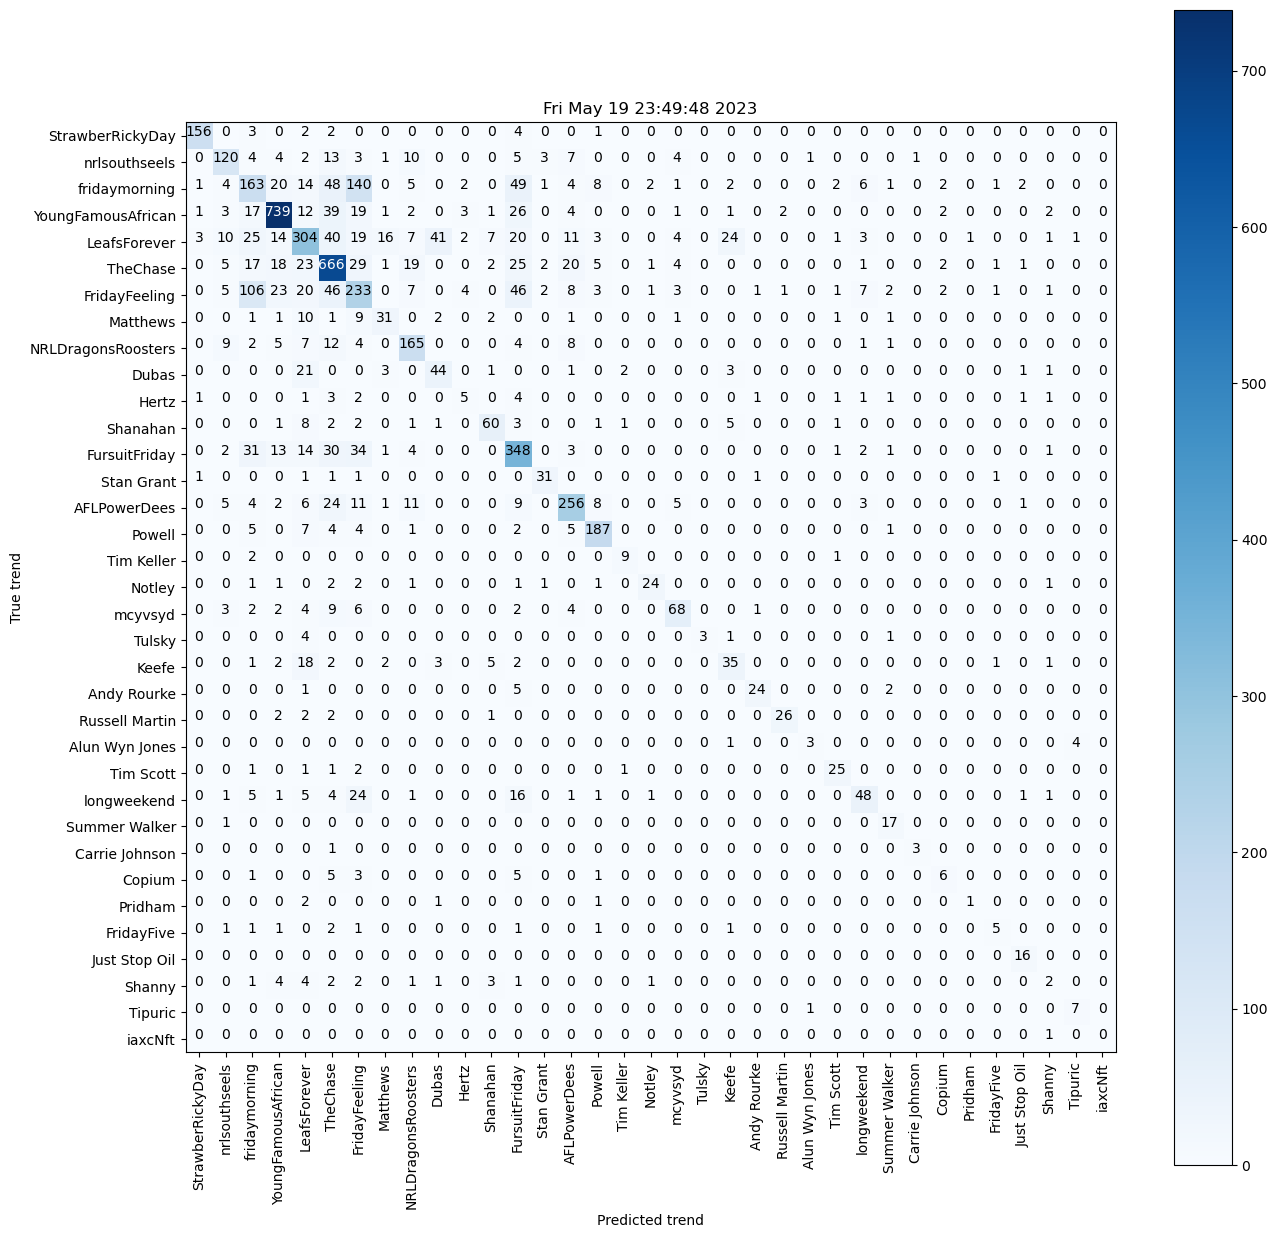

In [21]:
import matplotlib.pyplot as plt
from time import ctime
from sklearn.metrics import classification_report

trends_names = [trend[0] for trend in trends_map.items()]

fig, ax = plt.subplots(figsize=(15, 15))

# Plotting the confusion matrix
im = ax.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title(ctime())
plt.colorbar(im, ax=ax)

tick_marks = np.arange(len(trends_names))
plt.xticks(tick_marks, trends_names, rotation=90)
plt.yticks(tick_marks, trends_names)

thresh = confusion_matrix.max() / 2.0
for i, j in np.ndindex(confusion_matrix.shape):
    ax.text(j, i, format(confusion_matrix[i, j], 'd'),
            horizontalalignment="center",
            color="white" if confusion_matrix[i, j] > thresh else "black")

plt.ylabel('True trend')
plt.xlabel('Predicted trend')

plt.savefig('../NLP/Model_reports/plots/' + ctime().replace(' ', '_').replace(':', '_') + '.png', dpi=300)



In [22]:
from sklearn.metrics import classification_report
report = classification_report(true_trends, predicted_trends, target_names=trends_names,  output_dict=True)
print(report)

{'StrawberRickyDay': {'precision': 0.9570552147239264, 'recall': 0.9285714285714286, 'f1-score': 0.9425981873111783, 'support': 168}, 'nrlsouthseels': {'precision': 0.7100591715976331, 'recall': 0.6741573033707865, 'f1-score': 0.69164265129683, 'support': 178}, 'fridaymorning': {'precision': 0.41475826972010177, 'recall': 0.3410041841004184, 'f1-score': 0.3742824339839265, 'support': 478}, 'YoungFamousAfrican': {'precision': 0.8663540445486518, 'recall': 0.8445714285714285, 'f1-score': 0.855324074074074, 'support': 875}, 'LeafsForever': {'precision': 0.6166328600405679, 'recall': 0.5457809694793537, 'f1-score': 0.5790476190476191, 'support': 557}, 'TheChase': {'precision': 0.6930280957336108, 'recall': 0.7909738717339667, 'f1-score': 0.7387687188019967, 'support': 842}, 'FridayFeeling': {'precision': 0.42363636363636364, 'recall': 0.44550669216061184, 'f1-score': 0.4342963653308481, 'support': 523}, 'Matthews': {'precision': 0.543859649122807, 'recall': 0.5081967213114754, 'f1-score': 

d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(report['weighted avg'])

{'precision': 0.6675084188091494, 'recall': 0.6694633805278798, 'f1-score': 0.6655603887077582, 'support': 5721}


## Model report

In [27]:
import pandas as pd

report_data_frame_dict = {
    'time': [ctime()],
    'accuracy' : [report['accuracy']],
    'precision' : [report['weighted avg']['precision']],
    'recall' : [report['weighted avg']['recall']],
    'f1_score' : [report['weighted avg']['f1-score']],
    'loss' : [history.history['loss'][-1]],
    'number of tweets': [len(tweets)],
    'number of trends': [no_of_trends]
}

report_data_frame = pd.DataFrame(report_data_frame_dict)

report_data_frame.to_csv('../NLP/Model_reports/model_report.csv', mode='a', index=False, header=False)
